In [10]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout

from sklearn.metrics import classification_report

In [14]:
def leeDatos():

    dataSet = pd.read_csv("archives/Sentiment_Stock_data.csv", header=0)

    return dataSet

In [15]:
def encodeData(dataSet=0):
    misDatos = dataSet.dropna()

    return misDatos

In [17]:
datos = leeDatos()
print(datos)
print("\n")

encodeDatos = encodeData(datos)
print(encodeDatos)
print("\n")
print(encodeDatos['Sentiment'].mean())
print("\n")

            ID  Sentiment                                           Sentence
0            0          0  According to Gran , the company has no plans t...
1            1          1  For the last quarter of 2010 , Componenta 's n...
2            2          1  In the third quarter of 2010 , net sales incre...
3            3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4            4          1  Operating profit totalled EUR 21.1 mn , up fro...
...        ...        ...                                                ...
108746  111290          1  Philippines president Rodrigo Duterte urges pe...
108747  111291          1  Spain arrests three Pakistanis accused of prom...
108748  111292          1  Venezuela, where anger over food shortages is ...
108749  111293          1  A Hindu temple worker has been killed by three...
108750  111294          1  Ozone layer hole seems to be healing - US &amp...

[108751 rows x 3 columns]


            ID  Sentiment                      

In [18]:
ts_size = .25
trainSet, testSet = train_test_split(encodeDatos, test_size=ts_size, shuffle=False, random_state=0)
print(trainSet)
print('trainSet shape: ', trainSet.shape)
print(testSet)
print('testSet shape: ', testSet.shape)
print("\n")

          ID  Sentiment                                           Sentence
0          0          0  According to Gran , the company has no plans t...
1          1          1  For the last quarter of 2010 , Componenta 's n...
2          2          1  In the third quarter of 2010 , net sales incre...
3          3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4          4          1  Operating profit totalled EUR 21.1 mn , up fro...
...      ...        ...                                                ...
81558  84090          0  BBC News - Saudi diplomat shot dead in Bangladesh
81559  84091          0  Australia's mining boom placing Great Barrier ...
81560  84092          0  Daughter of Mubarak-era mogul Hussein Salem to...
81561  84093          0  France to require all drivers to have Breathal...
81562  84094          0  At Chechnya Polling Station, Votes for Putin E...

[81562 rows x 3 columns]
trainSet shape:  (81562, 3)
            ID  Sentiment                     

In [20]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

training_sentences= trainSet['Sentence']
training_labels = trainSet['Sentiment']
testing_sentences = testSet['Sentence']
testing_labels = testSet['Sentiment']

In [21]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [22]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [23]:
MLP_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    #GlobalAveragePooling1D(),
                    Flatten(),
                    Dense(16, activation='relu', name="Hidden_layer_1"),
                    Dense(8, activation='relu', name="Hidden_layer_2"),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [24]:
opt = 'adam'
loss_fun = 'binary_crossentropy'
acc = ['accuracy']

In [25]:
MLP_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [26]:
MLP_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outpul_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
num_epochs = 30

MLP_history = MLP_model.fit(training_padded,
                    training_labels,
                    validation_split=0.25,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
1912/1912 - 5s - 3ms/step - accuracy: 0.5427 - loss: 0.6752 - val_accuracy: 0.5122 - val_loss: 0.7374
Epoch 2/30
1912/1912 - 4s - 2ms/step - accuracy: 0.6035 - loss: 0.6241 - val_accuracy: 0.4949 - val_loss: 0.9266
Epoch 3/30
1912/1912 - 3s - 1ms/step - accuracy: 0.7052 - loss: 0.5269 - val_accuracy: 0.5004 - val_loss: 1.0896
Epoch 4/30
1912/1912 - 3s - 2ms/step - accuracy: 0.7819 - loss: 0.4220 - val_accuracy: 0.4972 - val_loss: 1.6913
Epoch 5/30
1912/1912 - 3s - 2ms/step - accuracy: 0.8306 - loss: 0.3423 - val_accuracy: 0.4938 - val_loss: 2.4358
Epoch 6/30
1912/1912 - 3s - 2ms/step - accuracy: 0.8597 - loss: 0.2865 - val_accuracy: 0.4984 - val_loss: 2.9006
Epoch 7/30
1912/1912 - 3s - 2ms/step - accuracy: 0.8802 - loss: 0.2466 - val_accuracy: 0.4985 - val_loss: 3.5580
Epoch 8/30
1912/1912 - 4s - 2ms/step - accuracy: 0.8947 - loss: 0.2164 - val_accuracy: 0.4976 - val_loss: 4.3476
Epoch 9/30
1912/1912 - 4s - 2ms/step - accuracy: 0.9072 - loss: 0.1935 - val_accuracy: 0.4969 - 

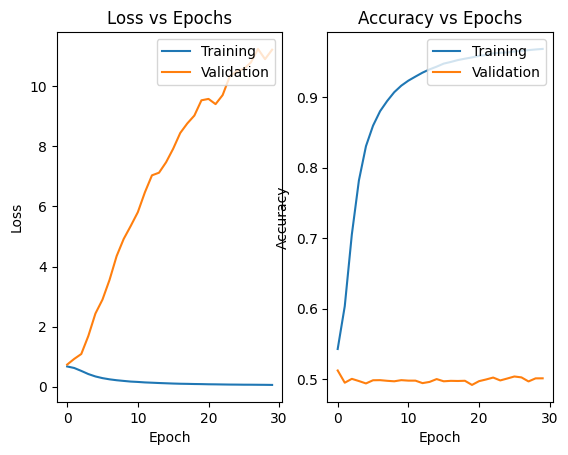

In [28]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(MLP_history.history['loss'])
plt.plot(MLP_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(MLP_history.history['accuracy'])
plt.plot(MLP_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [29]:
CNN_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                    AveragePooling1D(pool_size=3),
                    Flatten(),
                    Dense(2, activation='relu'),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [30]:
CNN_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [31]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ ?                      │   0 (unbuilt) │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outpul_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
CNN_history = CNN_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
2294/2294 - 5s - 2ms/step - accuracy: 0.5174 - loss: 0.6924 - val_accuracy: 0.4793 - val_loss: 0.6957
Epoch 2/30
2294/2294 - 5s - 2ms/step - accuracy: 0.5860 - loss: 0.6724 - val_accuracy: 0.4961 - val_loss: 0.7080
Epoch 3/30
2294/2294 - 4s - 2ms/step - accuracy: 0.6463 - loss: 0.6299 - val_accuracy: 0.4987 - val_loss: 0.7455
Epoch 4/30
2294/2294 - 4s - 2ms/step - accuracy: 0.6873 - loss: 0.5889 - val_accuracy: 0.5023 - val_loss: 0.7997
Epoch 5/30
2294/2294 - 6s - 3ms/step - accuracy: 0.7177 - loss: 0.5508 - val_accuracy: 0.4988 - val_loss: 0.8647
Epoch 6/30
2294/2294 - 4s - 2ms/step - accuracy: 0.7423 - loss: 0.5177 - val_accuracy: 0.5020 - val_loss: 0.9394
Epoch 7/30
2294/2294 - 9s - 4ms/step - accuracy: 0.7641 - loss: 0.4885 - val_accuracy: 0.5014 - val_loss: 0.9971
Epoch 8/30
2294/2294 - 5s - 2ms/step - accuracy: 0.7818 - loss: 0.4636 - val_accuracy: 0.5026 - val_loss: 1.1027
Epoch 9/30
2294/2294 - 5s - 2ms/step - accuracy: 0.7944 - loss: 0.4419 - val_accuracy: 0.5013 - 

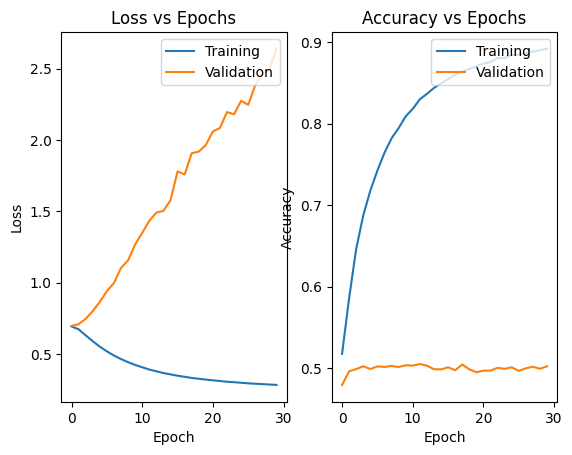

In [33]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [34]:
dropout_rate = 0.2
LSTM_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    LSTM(32, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(16, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(8),
                    Dropout(dropout_rate),
                    Dense(1, name="Outpul_layer")
                    ])

In [35]:
LSTM_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [36]:
LSTM_history = LSTM_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
2294/2294 - 129s - 56ms/step - accuracy: 0.4998 - loss: 0.7177 - val_accuracy: 0.5481 - val_loss: 0.6930
Epoch 2/30
2294/2294 - 128s - 56ms/step - accuracy: 0.4973 - loss: 0.7030 - val_accuracy: 0.5481 - val_loss: 0.6924
Epoch 3/30
2294/2294 - 136s - 59ms/step - accuracy: 0.4972 - loss: 0.6969 - val_accuracy: 0.4519 - val_loss: 0.6974
Epoch 4/30


KeyboardInterrupt: 

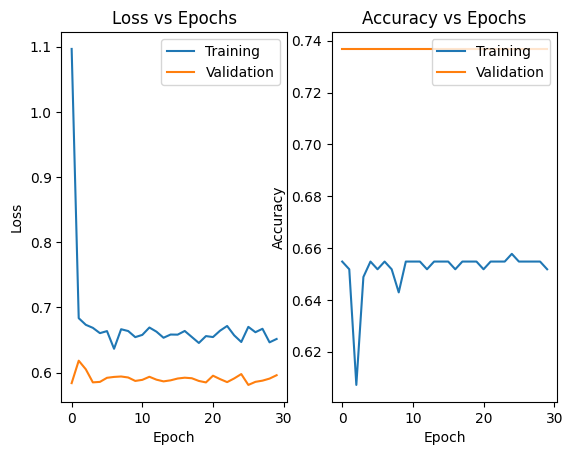

In [39]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [40]:
# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['MLP pred'] = MLP_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['CNN pred'] = CNN_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['LSTM pred'] = LSTM_model.predict(testing_padded).reshape(1,len(testing_padded))[0]

print(round(df_test))
print("\n")

df_perf = pd.DataFrame()
df_perf['MLP'] = MLP_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf['CNN'] = CNN_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf['LSTM'] = LSTM_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf.index = ['Loss', 'Accuracy']
print(df_perf)
print("\n")

report = classification_report(testing_labels, round(df_test['MLP pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

report = classification_report(testing_labels, round(df_test['CNN pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

report = classification_report(testing_labels, round(df_test['LSTM pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step
     real  MLP pred  CNN pred  LSTM pred
0       1       0.0       0.0        0.0
1       0       0.0       0.0        0.0
2       0       0.0       0.0        0.0
3       1       0.0       0.0        0.0
4       1       1.0       0.0        0.0
..    ...       ...       ...        ...
120     0       1.0       0.0        0.0
121     0       0.0       0.0        0.0
122     0       0.0       0.0        0.0
123     1       0.0       0.0        0.0
124     0       1.0       0.0        0.0

[125 rows x 4 columns]


4/4 - 0s - 8ms/step - accuracy: 0.5520 - loss: 0.8223
4/4 - 0s - 8ms/step - accuracy: 0.6480 - loss: 1.0131
4/4 - 0s - 29ms/step - accuracy: 0.6800 - loss: 0.6297
               MLP       CNN      LSTM
Loss      0.822307  1.013102  0.629717
Accuracy  0.552000  0.648000  0.680000


              precision    recall  f1-score  support
0              0.666667  0.68235